In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
df = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [6]:
(X_train, y_train), (X_test, y_test) = df

In [10]:
len(X_test)

10000

In [11]:
len(X_train)

60000

In [27]:
X_train = X_train/255
X_test = X_test/255

In [28]:
X_train[0].shape

(28, 28)

In [29]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

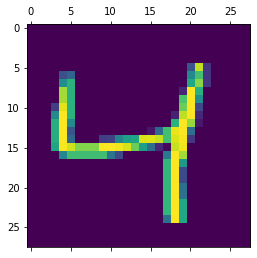

In [30]:
plt.matshow(X_train[2])

In [31]:
y_train[1]

0

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
x_train_flattened = X_train.reshape(len(X_train), 28*28)
x_test_flattened = X_test.reshape(len(X_test), 28*28)
x_train_flattened.shape

(60000, 784)

In [34]:
x_test_flattened.shape

(10000, 784)

In [35]:
x_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [37]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4748 - accuracy: 0.8762
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3045 - accuracy: 0.9146
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2835 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2670 - accuracy: 0.9259
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2618 - accuracy: 0.9272
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2583 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2553 - accuracy: 0.9288
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2531 - accuracy: 0.9302
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.251

In [38]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2692 - accuracy: 0.9248


[0.269230455160141, 0.9247999787330627]

In [40]:
y_prediction = model.predict(x_test_flattened)

313/313 [==============================] - 0s 948us/step


In [53]:
y_prediction[20]

array([4.5196849e-04, 3.5881141e-05, 5.2866376e-06, 4.1768944e-01,
       6.8623686e-01, 6.1256126e-02, 9.7642872e-09, 9.7366804e-01,
       2.0785081e-01, 9.9618143e-01], dtype=float32)

In [52]:
np.argmax(y_prediction[20])

9

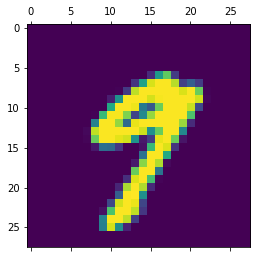

In [51]:
plt.matshow(X_test[20])

In [56]:
y_predicted_labels = [np.argmax(i) for i in y_prediction]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [61]:
cmd = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cmd

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    6,    6,    2,    1,    1],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   5,   11,  920,   16,    7,    5,   14,   12,   36,    6],
       [   2,    0,   18,  922,    0,   30,    2,   11,   16,    9],
       [   1,    2,    5,    2,  893,    0,   14,    5,    6,   54],
       [   7,    2,    1,   25,    6,  800,   13,    7,   25,    6],
       [   8,    3,    4,    2,    7,   13,  918,    2,    1,    0],
       [   1,    8,   21,    6,    3,    1,    0,  952,    0,   36],
       [   7,   14,    6,   27,    8,   43,   12,   10,  830,   17],
       [  11,    8,    1,   11,   14,    8,    0,   20,    2,  934]])>

Text(69.0, 0.5, 'Truth')

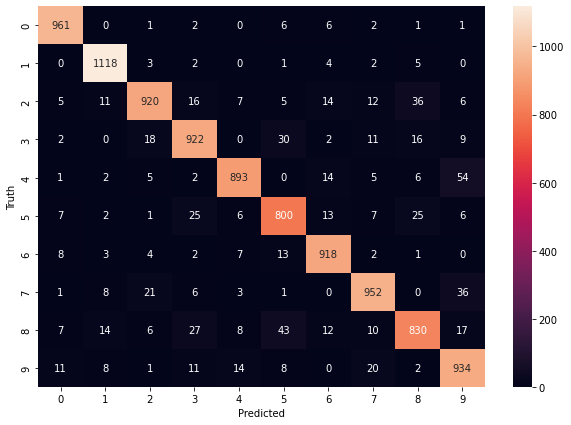

In [65]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cmd, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [66]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2768 - accuracy: 0.9197
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1248 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0877 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0673 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0533 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0440 - accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0372 - accuracy: 0.9882
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0292 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0240 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.020

In [68]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0911 - accuracy: 0.9750


[0.09113951772451401, 0.9750000238418579]

Text(69.0, 0.5, 'Truth')

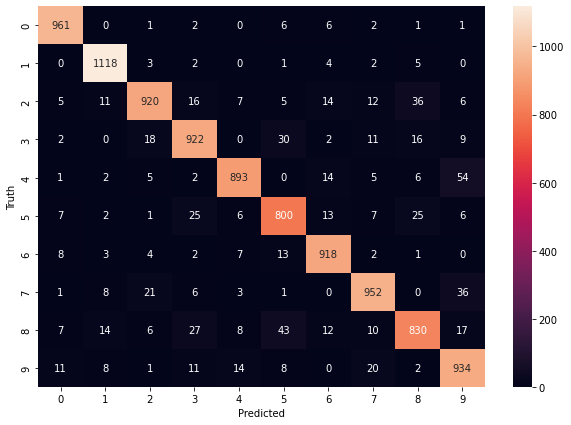

In [69]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cmd, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [72]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2757 - accuracy: 0.9216
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1245 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0855 - accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0649 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0519 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0405 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0329 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0282 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0223 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.018